In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [16]:
len(x_train)

60000

In [17]:
len(x_test)

10000

In [18]:
x_train[0].shape

(28, 28)

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

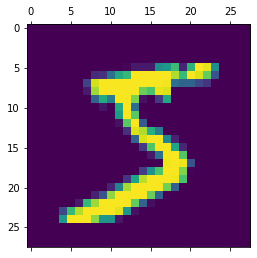

In [20]:
plt.matshow(x_train[0])

In [21]:
y_train[0]

5

In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [46]:
x_train_flat[0].shape

(784,)

In [29]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 863us/step - loss: 0.4666 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.2670 - accuracy: 0.9261


In [31]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.2695 - accuracy: 0.9255


[0.2695436179637909, 0.9254999756813049]

In [33]:
y_pre=model.predict(x_test_flat)
y_pre[0]

array([5.95889091e-02, 3.19331235e-07, 5.58457077e-02, 9.59871113e-01,
       1.92525983e-03, 1.17055506e-01, 1.68099859e-06, 9.99796510e-01,
       9.44494009e-02, 6.81462467e-01], dtype=float32)

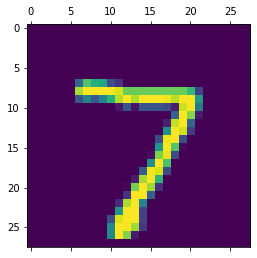

In [34]:
plt.matshow(x_test[0])

In [35]:
np.argmax(y_pre[0])

7

In [36]:
y_pre_labels=[np.argmax(i) for i in y_pre]

In [37]:
y_pre_labels[0]

7

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  10,    8,  927,   18,    7,    1,   11,   10,   35,    5],
       [   4,    0,   20,  932,    0,   17,    2,   11,   16,    8],
       [   2,    1,    5,    3,  905,    0,   10,    4,    9,   43],
       [  13,    2,    4,   43,   11,  757,   14,    8,   33,    7],
       [  15,    3,    4,    1,    7,   10,  915,    2,    1,    0],
       [   2,    5,   21,    7,    4,    0,    0,  958,    2,   29],
       [  10,    7,    8,   29,    9,   21,   10,   12,  859,    9],
       [  11,    7,    1,   14,   19,    4,    0,   23,    4,  926]])>

Text(69.0, 0.5, 'Truth')

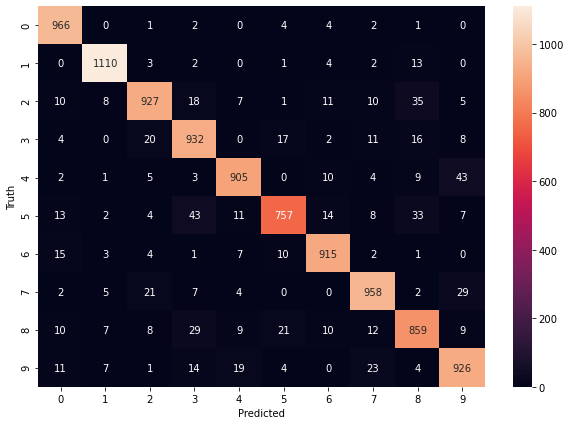

In [41]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [42]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1267 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0883 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0525 - accuracy: 0.9843


In [43]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 998us/step - loss: 0.0912 - accuracy: 0.9723


[0.09124089032411575, 0.9722999930381775]

Text(69.0, 0.5, 'truth')

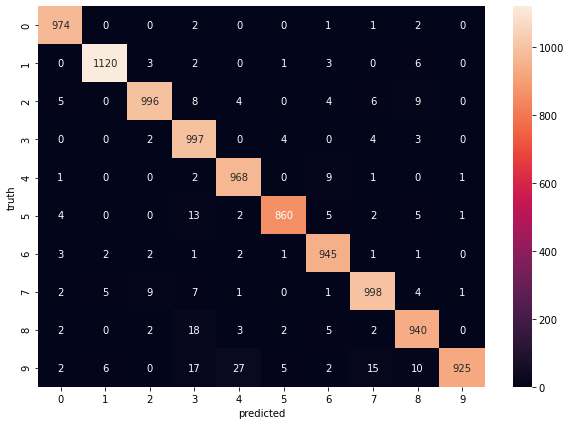

In [44]:
y_pred=model.predict(x_test_flat)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")